In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

# Image dimensions
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

train_dir = './dataset_blood_group'

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    validation_split=0.2 # Splitting validation set to 20%
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation'
)

# High accuracy mode using Deep CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation ='relu'),
    tf.keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    tf.keras.layers.Dense(train_generator.num_classes, activation ='softmax')
])

model.compile(optimizer ='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

# Training the model
model_history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_steps = validation_generator.samples // BATCH_SIZE
)

# Evaluating the model
eval = model.evaluate(validation_generator)
print(f"High Accuracy Model - Loss: {eval[0]}, Accuracy: {eval[1]}")

Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 477ms/step - accuracy: 0.3216 - loss: 1.7393 - val_accuracy: 0.7644 - val_loss: 0.6504
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8438 - loss: 0.6573 - val_accuracy: 0.7508 - val_loss: 0.6650
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.7474 - loss: 0.6935 - val_accuracy: 0.8395 - val_loss: 0.4652
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.4939 - val_accuracy: 0.8311 - val_loss: 0.4737
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.8235 - loss: 0.4720 - val_accuracy: 0.7652 - val_loss: 0.5835
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7812 - loss: 0.7063 - val_accuracy: 0.7728 - val_loss: 0.5544
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.8509 - loss: 0.3824 - val_accuracy: 0.8378 - val_loss: 0.3941
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8750 - loss: 0.3086 -

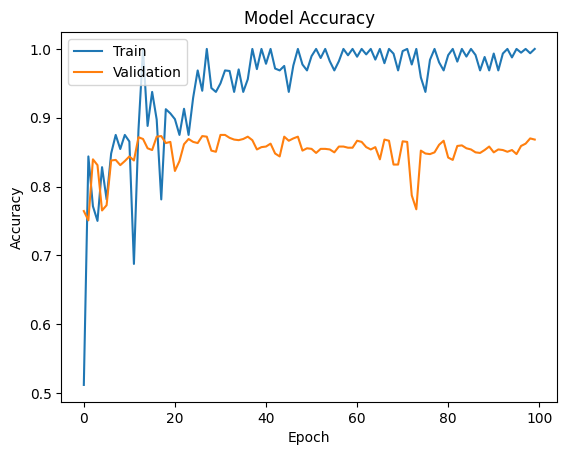

In [32]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to display the accuracy graph
plot_accuracy(model_history)

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image # type: ignore

In [34]:
# Load and preprocess the image
img_path = "./testABn.jpg"
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input
img_array /= 255.0  # Normalize

prediction = model.predict(img_array)

# Decode the prediction
predicted_class = np.argmax(prediction)  # Get the class index
class_labels = list(train_generator.class_indices.keys())  # Get class labels
print(f"Predicted class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted class: AB-


In [35]:
img_path = "./Test/testAp.jpg" 
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input
img_array /= 255.0  # Normalize

# Make a prediction
prediction = model.predict(img_array)

# Decode the prediction
predicted_class = np.argmax(prediction)  # Get the class index
class_labels = list(train_generator.class_indices.keys())  # Get class labels
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: A+


In [36]:
img_path = "./Test/testOn.jpg" 
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model input
img_array /= 255.0  # Normalize

# Make a prediction
prediction = model.predict(img_array)

# Decode the prediction
predicted_class = np.argmax(prediction)  # Get the class index
class_labels = list(train_generator.class_indices.keys())  # Get class labels
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: O-
